In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from chart_studio.plotly import plotly as py
#import plotly.graph_objects as go

%matplotlib inline

import warnings
warnings.simplefilter('ignore')


In [3]:
df = pd.read_csv('scraped_finn_data.csv')

In [4]:
df.head()

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Boligtype,Eieform_bolig,Soverom,Primærrom,Bruksareal,Etasje,Byggeår,Energimerking,Fasiliteter,Beskrivelse,Eiendomsmegler
0,"Åmotveien 9, 0880 Oslo",20 000 000 kr,-1,-1,-1,-1,148 - 150 m²,3,Enebolig,Eier (Selveier),-1,-1,-1,-1,-1,KORSVOLL - To moderne energi- og familievennli...,PrivatMegleren Panorama
1,"Vesteråsveien 12, 0382 Oslo",18 750 000 kr,-1,-1,-1,-1,195 - 223 m²,3,Enebolig,Eier (Selveier),-1,-1,-1,-1,-1,Ullernåsen- 2 SOLGT. 5 eneboliger med utsikt o...,PrivatMegleren Dyve & Partnere - Prosjekt
2,"St. Halvards gate 25E, 0192 Oslo",3 850 000 kr,76 000 kr,3 926 000 kr,3 964 kr,3 964 kr,Leilighet,Eier (Selveier),1,48 m²,48 m²,1940,E - gul,-1,[<selenium.webdriver.remote.webelement.WebElem...,Lys og lekker leilighet med solrik balkong. Go...,Aktiv Grønland/Bjørvika
3,"Selvbyggerveien 143, 0591 Oslo",3 200 000 kr,73 058 kr,8 009 kr,3 281 067 kr,3 281 067 kr,Leilighet,Andel,1,35 m²,37 m²,1,1953,G - rød,[<selenium.webdriver.remote.webelement.WebElem...,Romslig og attraktiv 2-roms | Hyggelig utsikt ...,Schala & Partners Årvoll
4,"Gregers Grams vei 6C, 0382 Oslo",18 250 000 kr,471 920 kr,18 721 920 kr,2 167 kr,2 167 kr,Enebolig,Eier (Selveier),4,208 m²,242 m²,2016,B - gul,-1,[<selenium.webdriver.remote.webelement.WebElem...,Tiltalende og moderne kjedet enebolig m/ takte...,PrivatMegleren Dyve & Partnere


In [5]:
# seems like Fasiliteter values were not sraped correctly, I will drop this column  

display(df['Fasiliteter'].head(5))

0                                                   -1
1                                                   -1
2    [<selenium.webdriver.remote.webelement.WebElem...
3    [<selenium.webdriver.remote.webelement.WebElem...
4    [<selenium.webdriver.remote.webelement.WebElem...
Name: Fasiliteter, dtype: object

In [6]:
df.drop('Fasiliteter', axis = 1, inplace = True)

In [7]:
df.shape

(1354, 16)

In [8]:
# From the above cell, seems like we don't have any NaN values. 
# This is because I used -1 as my missing values while scraping the data

# convert -1 to NaN
# The reason why i am converting all -1 values to NaN in the entire dataset, is simply because I beleive 
# if the dataset has -1 as a real value and not -1 for an empty values. This -1 is a corrupt value and still should be 
# replaced with a NaN
df = df.replace('-1', np.NaN)

In [9]:
df.head(3)

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Boligtype,Eieform_bolig,Soverom,Primærrom,Bruksareal,Etasje,Byggeår,Energimerking,Beskrivelse,Eiendomsmegler
0,"Åmotveien 9, 0880 Oslo",20 000 000 kr,NaN,NaN,NaN,NaN,148 - 150 m²,3,Enebolig,Eier (Selveier),NaN,NaN,NaN,NaN,KORSVOLL - To moderne energi- og familievennli...,PrivatMegleren Panorama
1,"Vesteråsveien 12, 0382 Oslo",18 750 000 kr,NaN,NaN,NaN,NaN,195 - 223 m²,3,Enebolig,Eier (Selveier),NaN,NaN,NaN,NaN,Ullernåsen- 2 SOLGT. 5 eneboliger med utsikt o...,PrivatMegleren Dyve & Partnere - Prosjekt
2,"St. Halvards gate 25E, 0192 Oslo",3 850 000 kr,76 000 kr,3 926 000 kr,3 964 kr,3 964 kr,Leilighet,Eier (Selveier),1,48 m²,48 m²,1940,E - gul,NaN,Lys og lekker leilighet med solrik balkong. Go...,Aktiv Grønland/Bjørvika


In [10]:
# drop rows where all values are NaN

df.dropna(how = 'all').reset_index().drop('index', axis = 1 ,inplace = True)

In [11]:
# check for duplicates

df.duplicated().sum()

321

In [12]:
# drop all duplicates

df.drop_duplicates(inplace = True)

In [ ]:
#df.dtypes

In [13]:
# check for missing values
df.isna().sum()

Address             0
Prisantydning       0
Fellesgjeld       107
Omkostninger      113
Totalpris         130
Felleskost        130
Boligtype           0
Eieform_bolig       0
Soverom             0
Primærrom           0
Bruksareal         56
Etasje             86
Byggeår            85
Energimerking     341
Beskrivelse         0
Eiendomsmegler    199
dtype: int64

<AxesSubplot:>

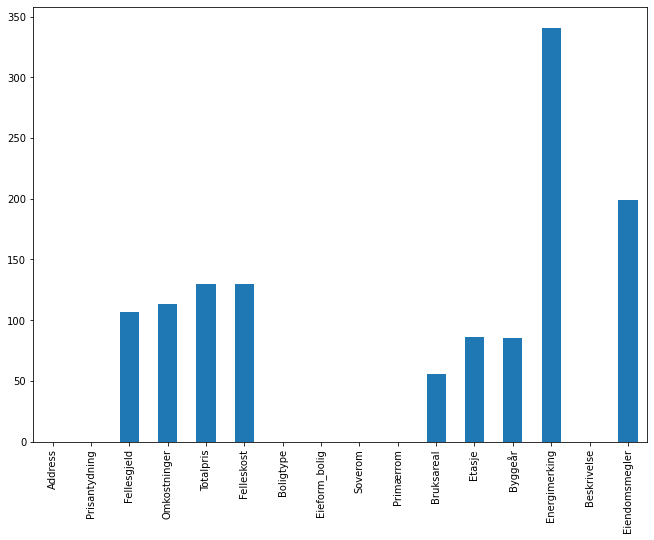

In [14]:
df.isna().sum().plot(kind ='bar', figsize=(11,8))

In [15]:
# I will drop all rows that don't contain at least 12 valid values (not NaN)

df.dropna(thresh = 12, inplace = True)

In [16]:
df.shape[0]

926

In [17]:
df.isna().sum()

Address             0
Prisantydning       0
Fellesgjeld         0
Omkostninger        6
Totalpris          23
Felleskost         23
Boligtype           0
Eieform_bolig       0
Soverom             0
Primærrom           0
Bruksareal          0
Etasje             12
Byggeår             2
Energimerking     235
Beskrivelse         0
Eiendomsmegler    198
dtype: int64

### # working with rows where 'Byggeår' is NaN (empty)

In [18]:
filt = (df['Byggeår'].isna())
df.loc[filt]

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Boligtype,Eieform_bolig,Soverom,Primærrom,Bruksareal,Etasje,Byggeår,Energimerking,Beskrivelse,Eiendomsmegler
949,"Løchenveien 14 - B1, 0286 Oslo",35 000 000 kr,172 792 kr,35 172 792 kr,NaN,NaN,Leilighet,Eier (Selveier),2,172 m²,4,4863 m² (eiet),NaN,NaN,Eksklusiv leilighet (B1) på 172 m2. Egen innga...,Sem & Johnsen
1198,"Lyberget 7, 1295 Oslo",20 000 000 kr,501 342 kr,20 501 342 kr,8 065 kr per år,8 065 kr per år,Enebolig,Eier (Selveier),0,1901,20781 m² (eiet),NaN,NaN,NaN,Enebolig med tomt på hele 20.780 kvm. Mulighet...,Krogsveen avd. Nordstrand


In [19]:
# just 2 rows with missing 'Byggeår', I will correct values in these 2 rows manually (cuz it's just 2 rows )

display(df.loc[949, 'Beskrivelse'])

# from Beskrivelse, I see that they mentioned 'Under oppføring' which means that they are still in the constraction fase
# I will set 'Byggeår' to 2021. I will also correct some other values

df.loc[949, ['Byggeår', 'Bruksareal', 'Soverom', 'Etasje']] = ('2021', '4863', '4', '2')

'Eksklusiv leilighet (B1) på 172 m2. Egen inngang, privat terrasse og hage. Heis og 2 garasjeplasser. Under oppføring'

In [20]:
display(df.loc[1198, 'Beskrivelse'])

df.loc[1198, ['Byggeår', 'Primærrom', 'Etasje', 'Soverom']] = ('1901', '20.780', '1', '5')

'Enebolig med tomt på hele 20.780 kvm. Mulighetsstudie for eiendommen foreligger.'

### # working with rows where 'Etasje' is NaN (empty)

In [21]:
df[ df['Etasje'].isna() ]

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Boligtype,Eieform_bolig,Soverom,Primærrom,Bruksareal,Etasje,Byggeår,Energimerking,Beskrivelse,Eiendomsmegler
8,"Kantarellen terrasse 15, 1286 Oslo",2 590 000 kr,216 310 kr,8 658 kr,2 814 968 kr,2 814 968 kr,Leilighet,Andel,1,59 m²,59 m²,NaN,1990,F - mørkegrønn,Stilig 2-roms med bad fra 2019 og garasjeplass...,Eiendomsmegler 1 Oslo Syd
49,"Christian Krohgs gate 30, 0186 Oslo",2 750 000 kr,728 073 kr,8 009 kr,3 486 082 kr,3 486 082 kr,Leilighet,Andel,1,44 m²,44 m²,NaN,1906,D - mørkegrønn,Unik fabrikkleilighet v/ Akerselva I IN-ordnin...,Schala & Partners Torshov
203,"Pionerstien 12, 1062 Oslo",3 600 000 kr,375 000 kr,8 658 kr,3 983 658 kr,3 983 658 kr,Leilighet,Andel,2,80 m²,96 m²,NaN,1980,E - rød,Attraktiv og romslig 3-roms med innglasset bal...,EiendomsMegler 1 Grorud
211,"Jerikoveien 63, 1067 Oslo",4 790 000 kr,204 225 kr,8 626 kr,5 002 851 kr,5 002 851 kr,Leilighet,Andel,3,120 m²,120 m²,NaN,1977,G - rød,Lys og familievennlig 4-roms endeleilighet med...,NaN
220,"Kristins vei 24, 0669 Oslo",3 200 000 kr,215 000 kr,15 554 kr,3 430 554 kr,3 430 554 kr,Leilighet,Andel,1,44 m²,48 m²,NaN,1965,G - rød,Flott 2-roms leilighet - Delikat bad/wc fra 20...,NaN
284,"Tostrups gate 22B, 0264 Oslo",2 700 000 kr,79 070 kr,2 779 070 kr,620 kr,620 kr,Leilighet,Eier (Selveier),1,23 m²,23 m²,NaN,1901,G - rød,Effektiv og rimelig 2-roms selveier med flott ...,PrivatMegleren Excellence
725,"Lutvannsveien 21, 0676 Oslo",3 000 000 kr,135 000 kr,76 342 kr,3 211 342 kr,3 211 342 kr,Leilighet,Eier (Selveier),1,55 m²,64 m²,NaN,1974,F - mørkegrønn,Lys 2-roms selveier med solrik innglasset balk...,NaN
1152,"Lindebergåsen 52A, 1068 Oslo",2 700 000 kr,525 789 kr,8 658 kr,3 234 447 kr,3 234 447 kr,Leilighet,Andel,1,62 m²,77 m²,NaN,1977,NaN,Meget tiltalende og romslig 2-roms hjørneleili...,EiendomsMegler 1 Grorud
1166,"Sollerudveien 31C, 0283 Oslo",1 950 000 kr,50 092 kr,2 000 092 kr,2 446 kr,2 446 kr,Leilighet,Eier (Selveier),0,28 m²,28 m²,NaN,1969,NaN,Lys og trivelig seniorleilighet (50+) |Nyere k...,NaN
1187,"Hafrsfjordgata 10A, 0273 Oslo",3 950 000 kr,131 098 kr,103 362 kr,4 184 460 kr,4 184 460 kr,Leilighet,Eier (Selveier),1,34 m²,34 m²,NaN,1929,NaN,Lys og innbydende 2-roms selveier - Hjørneleil...,Nordvik Nydalen


In [ ]:
# check the 'Beskrivelse' column, cuz we might find details about the floor ('Etasje') mentioned there.

for i in df[df['Etasje'].isna()].index:
    print(i,':', df.loc[i, 'Beskrivelse'])

In [ ]:
# I didn't find any useful information by checking the Beskrivelse for the rows where 'Etasje' is missing.
# But the data in these rows are in a good shape, except for Etasje. To avoid deleting these rows
# I will just fill 'Etasje' with the most frequent value, which is the second floor

#display( df['Etasje'].value_counts().index[0] ) 

#df['Etasje'].fillna(value = '2', inplace = True)

### working with the 'Prisantydning', 'Fellesgjeld', 'Omkostninger', 'Totalpris', 'Felleskost' columns

#### 'Fellesgjeld'

In [22]:
# if the value of a 'Fellesgjeld' cell contains 'per år' then its actually a 'kommunale avgifter' and  (I checked for these 
# addresses on Finn.no). this amount of money will be divided on 12 (number of months) and add it as if it was 'Felleskost.
# and I will assign 0 to fellesgjeld.

filt = (df['Fellesgjeld'].str.contains('per år'))

df[filt]

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Boligtype,Eieform_bolig,Soverom,Primærrom,Bruksareal,Etasje,Byggeår,Energimerking,Beskrivelse,Eiendomsmegler
82,"Bredes vei 23B, 0982 Oslo",7 650 000 kr,11 648 kr per år,NaN,NaN,NaN,Enebolig,Eier (Selveier),3,157 m²,202 m²,1978,F - oransje,NaN,Familievennlig enebolig i blindvei - 3 garasje...,EIE eiendomsmegling Lillestrøm
1018,"Motzfeldts gate 30, 0561 Oslo",35 000 000 kr,69 058 kr per år,NaN,NaN,NaN,Leilighet,Eier (Selveier),452 m²,717 m²,1892,295 m² (eiet),798 m²,NaN,Tøyen: Hel bygård med 8 leiligheter med mange ...,Aktiv Torshov
1130,"Bestumstubben 21, 0281 Oslo",10 900 000 kr,20 603 kr per år,NaN,NaN,NaN,Tomannsbolig,Eier (Selveier),5,207 m²,240 m²,1,1936,F - oransje,"Stor, innholdsrik halvpart av tomannsbolig (24...",Krogsveen avd. Hasle


In [23]:
df.loc[filt, ['Felleskost']] = df.loc[filt, 'Fellesgjeld'].apply(
    lambda x: str(np.round((float(x.replace('kr per år', '').replace(' ','')) / 12), 2)))

In [24]:
df.loc[filt, 'Fellesgjeld'] = '0'

In [25]:
df.loc[82]

Address                                   Bredes vei 23B, 0982 Oslo
Prisantydning                                          7 650 000 kr
Fellesgjeld                                                       0
Omkostninger                                                    NaN
Totalpris                                                       NaN
Felleskost                                                   970.67
Boligtype                                                  Enebolig
Eieform_bolig                                       Eier (Selveier)
Soverom                                                           3
Primærrom                                                    157 m²
Bruksareal                                                   202 m²
Etasje                                                         1978
Byggeår                                                 F - oransje
Energimerking                                                   NaN
Beskrivelse       Familievennlig enebolig i blin

#### Felleskost

In [26]:
filt = (df['Felleskost'].replace(np.NaN, 'NaN').str.contains('per år'))
df.loc[filt]

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Boligtype,Eieform_bolig,Soverom,Primærrom,Bruksareal,Etasje,Byggeår,Energimerking,Beskrivelse,Eiendomsmegler
47,"Enebakkveien 205, 0680 Oslo",15 990 000 kr,415 770 kr,16 405 770 kr,24 120 kr per år,24 120 kr per år,Tomannsbolig,Eier (Selveier),8,240 m²,246 m²,1952,G - rød,NaN,Hel horisontaldelt tomannsbolig med moderniser...,EIE eiendomsmegling Veitvet
48,"Elgtråkket 126, 1270 Oslo",8 000 000 kr,201 372 kr,8 201 372 kr,13 884 kr per år,13 884 kr per år,Enebolig,Eier (Selveier),6,190 m²,231 m²,1988,E - mørkegrønn,NaN,Påkostet enebolig over 3 plan med dobbelgarasj...,Notar Oslo
71,"Kongeveien 18B, 0787 Oslo",25 500 000 kr,638 842 kr,26 138 842 kr,20 385 kr per år,20 385 kr per år,Enebolig,Eier (Selveier),3,246 m²,296 m²,1970,F - rød,NaN,Flott villa med spektakulær utsikt | Nydelige ...,NaN
86,"Pilestredet 88 E, 0358 Oslo",26 000 000 kr,651 378 kr,26 651 378 kr,40 094 kr per år,40 094 kr per år,Rekkehus,Eier (Selveier),5,348 m²,348 m²,1924,E - gul,NaN,FAGERBORG/ADAMSTUEN: Unikt townhouse rekkehus ...,BOA Eiendomsmegling Oslo Vest AS
89,"Holtveien 25B, 1177 Oslo",11 800 000 kr,302 140 kr,12 102 140 kr,15 100 kr per år,15 100 kr per år,Enebolig,Eier (Selveier),4,140 m²,140 m²,1984,G - rød,NaN,"Kjedet enebolig med garasje, usjenert hage og ...",EIE eiendomsmegling Bekkelaget & Nordstrand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326,"Melkeveien 23A, 0779 Oslo",34 800 000 kr,885 670 kr,35 685 670 kr,28 696 kr per år,28 696 kr per år,Enebolig,Eier (Selveier),6,460 m²,606 m²,1988,E - rød,NaN,Praktfull villa med nydelig beliggenhet i Hemi...,PrivatMegleren Dyve & Partnere
1330,"Bergslia 10, 0854 Oslo",14 900 000 kr,388 170 kr,15 288 170 kr,15 523 kr per år,15 523 kr per år,Enebolig,Eier (Selveier),3,138 m²,192 m²,1970,E - gul,NaN,BERG - Frittliggende enebolig med stor og frod...,PrivatMegleren Renommé
1331,"Holmenkollveien 16 B, 0376 Oslo",19 600 000 kr,506 020 kr,20 106 020 kr,34 204 kr per år,34 204 kr per år,Enebolig,Eier (Selveier),6,349 m²,353 m²,1895,G - gul,NaN,Stor og oppgradert enebolig - Pent opparbeidet...,"EIE eiendomsmegling Røa, Skøyen og Ullern"
1336,"Monolitveien 14 C, 0369 Oslo",24 700 000 kr,618 878 kr,25 318 878 kr,46 160 kr per år,46 160 kr per år,Enebolig,Eier (Selveier),4,315 m²,355 m²,1936,9,NaN,BORGEN: Flott enebolig o/3 etasjer + loft. Idy...,BOA Eiendomsmegling Oslo Vest AS


In [27]:
df.loc[filt, 'Felleskost'] = df.loc[filt, 'Felleskost'].apply( lambda x: str(
    np.round((float(x.replace('kr per år', '').replace(' ','')) / 12), 2)) )

In [28]:
# here, I will swap values: 'Fellesgjeld' will go for 'Omkostninger' and 'Omkostninger' will go for 'Totalpris'

df.loc[filt, ['Omkostninger', 'Totalpris']] = df.loc[filt, ['Fellesgjeld', 'Omkostninger']].values

In [29]:
# i will also set values for 'Fellesgjeld' to be '0'

df.loc[filt, 'Fellesgjeld'] = '0'

In [30]:
df.loc[filt]

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Boligtype,Eieform_bolig,Soverom,Primærrom,Bruksareal,Etasje,Byggeår,Energimerking,Beskrivelse,Eiendomsmegler
47,"Enebakkveien 205, 0680 Oslo",15 990 000 kr,0,415 770 kr,16 405 770 kr,2010.0,Tomannsbolig,Eier (Selveier),8,240 m²,246 m²,1952,G - rød,NaN,Hel horisontaldelt tomannsbolig med moderniser...,EIE eiendomsmegling Veitvet
48,"Elgtråkket 126, 1270 Oslo",8 000 000 kr,0,201 372 kr,8 201 372 kr,1157.0,Enebolig,Eier (Selveier),6,190 m²,231 m²,1988,E - mørkegrønn,NaN,Påkostet enebolig over 3 plan med dobbelgarasj...,Notar Oslo
71,"Kongeveien 18B, 0787 Oslo",25 500 000 kr,0,638 842 kr,26 138 842 kr,1698.75,Enebolig,Eier (Selveier),3,246 m²,296 m²,1970,F - rød,NaN,Flott villa med spektakulær utsikt | Nydelige ...,NaN
86,"Pilestredet 88 E, 0358 Oslo",26 000 000 kr,0,651 378 kr,26 651 378 kr,3341.17,Rekkehus,Eier (Selveier),5,348 m²,348 m²,1924,E - gul,NaN,FAGERBORG/ADAMSTUEN: Unikt townhouse rekkehus ...,BOA Eiendomsmegling Oslo Vest AS
89,"Holtveien 25B, 1177 Oslo",11 800 000 kr,0,302 140 kr,12 102 140 kr,1258.33,Enebolig,Eier (Selveier),4,140 m²,140 m²,1984,G - rød,NaN,"Kjedet enebolig med garasje, usjenert hage og ...",EIE eiendomsmegling Bekkelaget & Nordstrand
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1326,"Melkeveien 23A, 0779 Oslo",34 800 000 kr,0,885 670 kr,35 685 670 kr,2391.33,Enebolig,Eier (Selveier),6,460 m²,606 m²,1988,E - rød,NaN,Praktfull villa med nydelig beliggenhet i Hemi...,PrivatMegleren Dyve & Partnere
1330,"Bergslia 10, 0854 Oslo",14 900 000 kr,0,388 170 kr,15 288 170 kr,1293.58,Enebolig,Eier (Selveier),3,138 m²,192 m²,1970,E - gul,NaN,BERG - Frittliggende enebolig med stor og frod...,PrivatMegleren Renommé
1331,"Holmenkollveien 16 B, 0376 Oslo",19 600 000 kr,0,506 020 kr,20 106 020 kr,2850.33,Enebolig,Eier (Selveier),6,349 m²,353 m²,1895,G - gul,NaN,Stor og oppgradert enebolig - Pent opparbeidet...,"EIE eiendomsmegling Røa, Skøyen og Ullern"
1336,"Monolitveien 14 C, 0369 Oslo",24 700 000 kr,0,618 878 kr,25 318 878 kr,3846.67,Enebolig,Eier (Selveier),4,315 m²,355 m²,1936,9,NaN,BORGEN: Flott enebolig o/3 etasjer + loft. Idy...,BOA Eiendomsmegling Oslo Vest AS


####  'Prisantydning', 'Fellesgjeld', 'Omkostninger', 'Totalpris' columns

#### Totalpris

In [31]:
# convert the values of these columns to numric values

for col in ['Prisantydning', 'Fellesgjeld', 'Omkostninger', 'Totalpris', 'Felleskost']:
    df[col] = df[col].apply(lambda x: str(x).replace('kr','').replace(' ','')).astype('float')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 926 entries, 2 to 1353
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Address         926 non-null    object 
 1   Prisantydning   926 non-null    float64
 2   Fellesgjeld     926 non-null    float64
 3   Omkostninger    920 non-null    float64
 4   Totalpris       903 non-null    float64
 5   Felleskost      906 non-null    float64
 6   Boligtype       926 non-null    object 
 7   Eieform_bolig   926 non-null    object 
 8   Soverom         926 non-null    object 
 9   Primærrom       926 non-null    object 
 10  Bruksareal      926 non-null    object 
 11  Etasje          915 non-null    object 
 12  Byggeår         926 non-null    object 
 13  Energimerking   691 non-null    object 
 14  Beskrivelse     926 non-null    object 
 15  Eiendomsmegler  728 non-null    object 
dtypes: float64(5), object(11)
memory usage: 155.3+ KB


In [33]:
filt = (df['Prisantydning'] > df['Totalpris'])
df.loc[filt]

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Boligtype,Eieform_bolig,Soverom,Primærrom,Bruksareal,Etasje,Byggeår,Energimerking,Beskrivelse,Eiendomsmegler
2,"St. Halvards gate 25E, 0192 Oslo",3850000.0,76000.0,3926000.0,3964.0,3964.0,Leilighet,Eier (Selveier),1,48 m²,48 m²,1940,E - gul,NaN,Lys og lekker leilighet med solrik balkong. Go...,Aktiv Grønland/Bjørvika
4,"Gregers Grams vei 6C, 0382 Oslo",18250000.0,471920.0,18721920.0,2167.0,2167.0,Enebolig,Eier (Selveier),4,208 m²,242 m²,2016,B - gul,NaN,Tiltalende og moderne kjedet enebolig m/ takte...,PrivatMegleren Dyve & Partnere
6,"Messepromenaden 10, 0279 Oslo",7700000.0,193842.0,7893842.0,3237.0,3237.0,Leilighet,Eier (Selveier),2,65 m²,72 m²,5,2005,C - mørkegrønn,Herlig selveier midt i hjertet av Skøyen. 5. e...,NaN
9,"Langes gate 7, 0165 Oslo",6500000.0,174070.0,6674070.0,2348.0,2348.0,Leilighet,Eier (Selveier),2,82 m²,85 m²,1869,G - rød,NaN,"Klassisk, gjennomgående og sentrumsnær 3-roms ...",Privatmegleren Tjuvholmen
11,"Ole Messelts vei 3, 0676 Oslo",4300000.0,120297.0,4420297.0,2786.0,2786.0,Leilighet,Eier (Selveier),2,59 m²,60 m²,3,2018,C - mørkegrønn,"Rålekker og stilren 3-roms hjørneleilighet - ""...",Aktiv Østensjø/Lambertseter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,"Munkedamsveien 70B, 0270 Oslo",6200000.0,50107.0,6250107.0,3700.0,3700.0,Leilighet,Eier (Selveier),2,62 m²,62 m²,4,1950,G - oransje,Påkostet og meget innbydende 3-roms hjørneleil...,Nordvik Bærum
1340,"Hans Nordahls gate 18, 0481 Oslo",4590000.0,115920.0,4705920.0,2305.0,2305.0,Leilighet,Eier (Selveier),1,43 m²,45 m²,4,2021,C - mørkegrønn,"Lekker, helt ny 2-roms fra 2021 i 4. etg. | V....",Røisland & Co Eiendomsmegling AS
1342,"Bjerkebakken 78B, 0757 Oslo",3590000.0,91124.0,3681124.0,2678.0,2678.0,Leilighet,Eier (Selveier),1,40 m²,40 m²,2,1961,NaN,Lekker 2-roms med attraktiv beliggenhet! Balko...,EiendomsMegler 1 Fornebu
1345,"Stensgata 27, 0358 Oslo",8500000.0,19150.0,8519150.0,3255.0,3255.0,Leilighet,Aksje,2,91 m²,91 m²,2,1923,E - oransje,Lekker 3-roms (91 kvm) med balkong - HTH kjøkk...,PrivatMegleren Scenario


In [34]:
# here, I will also swap values: 'Fellesgjeld' will go for 'Omkostninger' and 'Omkostninger' will go for 'Totalpris'

df.loc[filt, ['Omkostninger', 'Totalpris']] = df.loc[filt, ['Fellesgjeld', 'Omkostninger']].values

In [35]:
# I will also set values for 'Fellesgjeld' to be '0'

df.loc[filt, 'Fellesgjeld'] = '0'

In [36]:
df.loc[filt]

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Boligtype,Eieform_bolig,Soverom,Primærrom,Bruksareal,Etasje,Byggeår,Energimerking,Beskrivelse,Eiendomsmegler
2,"St. Halvards gate 25E, 0192 Oslo",3850000.0,0,76000.0,3926000.0,3964.0,Leilighet,Eier (Selveier),1,48 m²,48 m²,1940,E - gul,NaN,Lys og lekker leilighet med solrik balkong. Go...,Aktiv Grønland/Bjørvika
4,"Gregers Grams vei 6C, 0382 Oslo",18250000.0,0,471920.0,18721920.0,2167.0,Enebolig,Eier (Selveier),4,208 m²,242 m²,2016,B - gul,NaN,Tiltalende og moderne kjedet enebolig m/ takte...,PrivatMegleren Dyve & Partnere
6,"Messepromenaden 10, 0279 Oslo",7700000.0,0,193842.0,7893842.0,3237.0,Leilighet,Eier (Selveier),2,65 m²,72 m²,5,2005,C - mørkegrønn,Herlig selveier midt i hjertet av Skøyen. 5. e...,NaN
9,"Langes gate 7, 0165 Oslo",6500000.0,0,174070.0,6674070.0,2348.0,Leilighet,Eier (Selveier),2,82 m²,85 m²,1869,G - rød,NaN,"Klassisk, gjennomgående og sentrumsnær 3-roms ...",Privatmegleren Tjuvholmen
11,"Ole Messelts vei 3, 0676 Oslo",4300000.0,0,120297.0,4420297.0,2786.0,Leilighet,Eier (Selveier),2,59 m²,60 m²,3,2018,C - mørkegrønn,"Rålekker og stilren 3-roms hjørneleilighet - ""...",Aktiv Østensjø/Lambertseter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,"Munkedamsveien 70B, 0270 Oslo",6200000.0,0,50107.0,6250107.0,3700.0,Leilighet,Eier (Selveier),2,62 m²,62 m²,4,1950,G - oransje,Påkostet og meget innbydende 3-roms hjørneleil...,Nordvik Bærum
1340,"Hans Nordahls gate 18, 0481 Oslo",4590000.0,0,115920.0,4705920.0,2305.0,Leilighet,Eier (Selveier),1,43 m²,45 m²,4,2021,C - mørkegrønn,"Lekker, helt ny 2-roms fra 2021 i 4. etg. | V....",Røisland & Co Eiendomsmegling AS
1342,"Bjerkebakken 78B, 0757 Oslo",3590000.0,0,91124.0,3681124.0,2678.0,Leilighet,Eier (Selveier),1,40 m²,40 m²,2,1961,NaN,Lekker 2-roms med attraktiv beliggenhet! Balko...,EiendomsMegler 1 Fornebu
1345,"Stensgata 27, 0358 Oslo",8500000.0,0,19150.0,8519150.0,3255.0,Leilighet,Aksje,2,91 m²,91 m²,2,1923,E - oransje,Lekker 3-roms (91 kvm) med balkong - HTH kjøkk...,PrivatMegleren Scenario


In [37]:
filt = (df['Omkostninger'] > df['Totalpris'])
df.loc[filt]

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Boligtype,Eieform_bolig,Soverom,Primærrom,Bruksareal,Etasje,Byggeår,Energimerking,Beskrivelse,Eiendomsmegler


<AxesSubplot:>

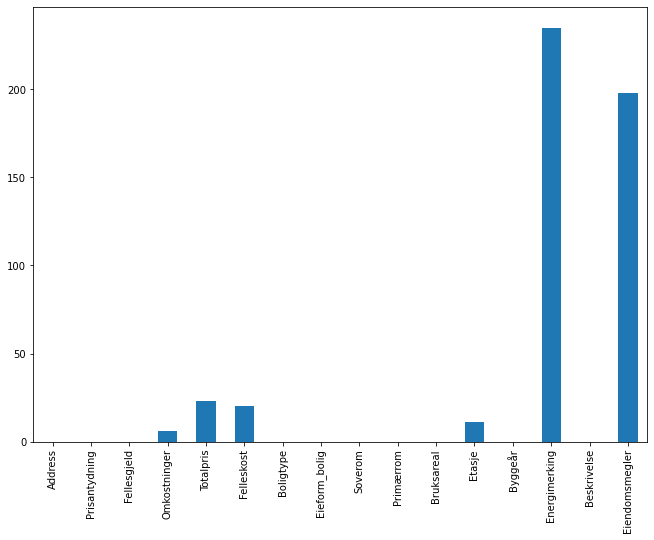

In [38]:
df.isna().sum().plot(kind ='bar', figsize=(11,8))

In [39]:
filt = (df['Totalpris'].isna())
df.loc[filt]

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Boligtype,Eieform_bolig,Soverom,Primærrom,Bruksareal,Etasje,Byggeår,Energimerking,Beskrivelse,Eiendomsmegler
82,"Bredes vei 23B, 0982 Oslo",7650000.0,0.0,NaN,NaN,970.67,Enebolig,Eier (Selveier),3,157 m²,202 m²,1978,F - oransje,NaN,Familievennlig enebolig i blindvei - 3 garasje...,EIE eiendomsmegling Lillestrøm
162,"Dalssvingen 19A, 1285 Oslo",3940000.0,114170.0,4054170.0,NaN,NaN,Tomannsbolig,Eier (Selveier),3,80 m²,84 m²,1991,E - rød,NaN,Pen 1/2-part av tomannsbolig i et veletablert ...,PrivatMegleren Panorama
176,"Akersveien 18, 0177 Oslo",5300000.0,2303.0,NaN,NaN,NaN,Leilighet,Eier (Selveier),1,46 m²,47 m²,1,2021,NaN,Salg av kontraktsposisjon | Ny 2-roms selveier...,Sem & Johnsen
227,"Th. Kittelsens vei 26, 0379 Oslo",13250000.0,93342.0,13343342.0,NaN,NaN,Tomannsbolig,Eier (Selveier),4,143 m²,180 m²,2021,5,NaN,Abbedikollen - Attraktiv halvpart tomannsbolig...,Nordvik Bygdøy Allé
250,"Ekebergveien 279, 1166 Oslo",15600000.0,405670.0,16005670.0,NaN,NaN,Tomannsbolig,Eier (Selveier),5,284 m²,364 m²,1922,G - oransje,NaN,"Velholdt, hel tomannsbolig med to enheter (262...",PrivatMegleren Panorama
678,"Sondrevegen 3G, 0378 Oslo",14500000.0,372142.0,14872142.0,NaN,NaN,Leilighet,Eier (Selveier),3,158 m²,158 m²,-2,1970,NaN,"Unik, nyoppusset terrasseleilighet med nydelig...",Nordvik Bygdøy Allé
732,"Steingrimsvei 12 B, 1185 Oslo",11700000.0,315642.0,12015642.0,NaN,NaN,Enebolig,Eier (Selveier),4,176 m²,210 m²,1938,G - rød,NaN,210m² enebolig med 5-års garanti og høy standa...,PrivatMegleren Aveny
739,"Vallegata 22, 0454 Oslo",29500000.0,817342.0,30317342.0,NaN,NaN,Enebolig,Eier (Selveier),5,358 m²,432 m²,3,1985,F - oransje,"Stor enebolig 432 BRA over 3 plan m/utleiedel,...",Nordvik Asker
794,"Sørkedalsveien 227, 0754 Oslo",17000000.0,440670.0,17440670.0,NaN,NaN,Tomannsbolig,Eier (Selveier),7,279 m²,318 m²,1948,10,NaN,Hel tomannsbolig over 3 plan på 318 m² med flo...,PrivatMegleren Panorama
852,"Jomfrubråtveien 85 og 85B, 1179 Oslo",32500000.0,1040670.0,33540670.0,NaN,NaN,Enebolig,Eier (Selveier),308 m²,507 m²,1923,D - mørkegrønn,1379 m² (eiet),NaN,To eneboliger med meget attraktiv og populær b...,PrivatMegleren Panorama


In [40]:
# here, I will also swap values: 'Fellesgjeld' will go for 'Omkostninger' and 'Omkostninger' will go for 'Totalpris'
# why i am sure that the value of the Fellesgjeld column is the real values of the 'Omkostninger', the reason is that in Norway
# when you sell a 'Selveier' house/flat, we pay 2.5% of the 'Totalpris' as 'Omkostninger', and by calculating 2.5% of the
# 'Totalpris' which if the values in the 'Omkostninger' column by now, you get the number we have in the 'Fellesgjeld' column

df.loc[filt, ['Omkostninger', 'Totalpris']] = df.loc[filt, ['Fellesgjeld', 'Omkostninger']].values

In [41]:
# i will also set values for 'Fellesgjeld' to be '0'

df.loc[filt, 'Fellesgjeld'] = '0'

In [42]:
df.loc[filt]

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Boligtype,Eieform_bolig,Soverom,Primærrom,Bruksareal,Etasje,Byggeår,Energimerking,Beskrivelse,Eiendomsmegler
82,"Bredes vei 23B, 0982 Oslo",7650000.0,0,0.0,NaN,970.67,Enebolig,Eier (Selveier),3,157 m²,202 m²,1978,F - oransje,NaN,Familievennlig enebolig i blindvei - 3 garasje...,EIE eiendomsmegling Lillestrøm
162,"Dalssvingen 19A, 1285 Oslo",3940000.0,0,114170.0,4054170.0,NaN,Tomannsbolig,Eier (Selveier),3,80 m²,84 m²,1991,E - rød,NaN,Pen 1/2-part av tomannsbolig i et veletablert ...,PrivatMegleren Panorama
176,"Akersveien 18, 0177 Oslo",5300000.0,0,2303.0,NaN,NaN,Leilighet,Eier (Selveier),1,46 m²,47 m²,1,2021,NaN,Salg av kontraktsposisjon | Ny 2-roms selveier...,Sem & Johnsen
227,"Th. Kittelsens vei 26, 0379 Oslo",13250000.0,0,93342.0,13343342.0,NaN,Tomannsbolig,Eier (Selveier),4,143 m²,180 m²,2021,5,NaN,Abbedikollen - Attraktiv halvpart tomannsbolig...,Nordvik Bygdøy Allé
250,"Ekebergveien 279, 1166 Oslo",15600000.0,0,405670.0,16005670.0,NaN,Tomannsbolig,Eier (Selveier),5,284 m²,364 m²,1922,G - oransje,NaN,"Velholdt, hel tomannsbolig med to enheter (262...",PrivatMegleren Panorama
678,"Sondrevegen 3G, 0378 Oslo",14500000.0,0,372142.0,14872142.0,NaN,Leilighet,Eier (Selveier),3,158 m²,158 m²,-2,1970,NaN,"Unik, nyoppusset terrasseleilighet med nydelig...",Nordvik Bygdøy Allé
732,"Steingrimsvei 12 B, 1185 Oslo",11700000.0,0,315642.0,12015642.0,NaN,Enebolig,Eier (Selveier),4,176 m²,210 m²,1938,G - rød,NaN,210m² enebolig med 5-års garanti og høy standa...,PrivatMegleren Aveny
739,"Vallegata 22, 0454 Oslo",29500000.0,0,817342.0,30317342.0,NaN,Enebolig,Eier (Selveier),5,358 m²,432 m²,3,1985,F - oransje,"Stor enebolig 432 BRA over 3 plan m/utleiedel,...",Nordvik Asker
794,"Sørkedalsveien 227, 0754 Oslo",17000000.0,0,440670.0,17440670.0,NaN,Tomannsbolig,Eier (Selveier),7,279 m²,318 m²,1948,10,NaN,Hel tomannsbolig over 3 plan på 318 m² med flo...,PrivatMegleren Panorama
852,"Jomfrubråtveien 85 og 85B, 1179 Oslo",32500000.0,0,1040670.0,33540670.0,NaN,Enebolig,Eier (Selveier),308 m²,507 m²,1923,D - mørkegrønn,1379 m² (eiet),NaN,To eneboliger med meget attraktiv og populær b...,PrivatMegleren Panorama


In [43]:
filt = (df['Felleskost'].isna())
df.loc[filt]

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Boligtype,Eieform_bolig,Soverom,Primærrom,Bruksareal,Etasje,Byggeår,Energimerking,Beskrivelse,Eiendomsmegler
162,"Dalssvingen 19A, 1285 Oslo",3940000.0,0,114170.0,4054170.0,NaN,Tomannsbolig,Eier (Selveier),3,80 m²,84 m²,1991,E - rød,NaN,Pen 1/2-part av tomannsbolig i et veletablert ...,PrivatMegleren Panorama
176,"Akersveien 18, 0177 Oslo",5300000.0,0,2303.0,NaN,NaN,Leilighet,Eier (Selveier),1,46 m²,47 m²,1,2021,NaN,Salg av kontraktsposisjon | Ny 2-roms selveier...,Sem & Johnsen
227,"Th. Kittelsens vei 26, 0379 Oslo",13250000.0,0,93342.0,13343342.0,NaN,Tomannsbolig,Eier (Selveier),4,143 m²,180 m²,2021,5,NaN,Abbedikollen - Attraktiv halvpart tomannsbolig...,Nordvik Bygdøy Allé
250,"Ekebergveien 279, 1166 Oslo",15600000.0,0,405670.0,16005670.0,NaN,Tomannsbolig,Eier (Selveier),5,284 m²,364 m²,1922,G - oransje,NaN,"Velholdt, hel tomannsbolig med to enheter (262...",PrivatMegleren Panorama
678,"Sondrevegen 3G, 0378 Oslo",14500000.0,0,372142.0,14872142.0,NaN,Leilighet,Eier (Selveier),3,158 m²,158 m²,-2,1970,NaN,"Unik, nyoppusset terrasseleilighet med nydelig...",Nordvik Bygdøy Allé
732,"Steingrimsvei 12 B, 1185 Oslo",11700000.0,0,315642.0,12015642.0,NaN,Enebolig,Eier (Selveier),4,176 m²,210 m²,1938,G - rød,NaN,210m² enebolig med 5-års garanti og høy standa...,PrivatMegleren Aveny
739,"Vallegata 22, 0454 Oslo",29500000.0,0,817342.0,30317342.0,NaN,Enebolig,Eier (Selveier),5,358 m²,432 m²,3,1985,F - oransje,"Stor enebolig 432 BRA over 3 plan m/utleiedel,...",Nordvik Asker
794,"Sørkedalsveien 227, 0754 Oslo",17000000.0,0,440670.0,17440670.0,NaN,Tomannsbolig,Eier (Selveier),7,279 m²,318 m²,1948,10,NaN,Hel tomannsbolig over 3 plan på 318 m² med flo...,PrivatMegleren Panorama
852,"Jomfrubråtveien 85 og 85B, 1179 Oslo",32500000.0,0,1040670.0,33540670.0,NaN,Enebolig,Eier (Selveier),308 m²,507 m²,1923,D - mørkegrønn,1379 m² (eiet),NaN,To eneboliger med meget attraktiv og populær b...,PrivatMegleren Panorama
888,"Nordstrand terrasse 59, 1170 Oslo",11500000.0,0,288842.0,11788842.0,NaN,Enebolig,Eier (Selveier),4,173 m²,205 m²,3,1979,G - oransje,Enebolig over 3 plan med fantastisk fjordutsik...,Krogsveen avd. Sandvika


In [44]:
# if the value of the 'Omkostninger' is less than 10 000 then it belongs to 'Felleskost'

df.loc[filt, 'Felleskost'] = df.loc[filt, 'Omkostninger'].apply(lambda x: x if x < 10000 else 0)

In [45]:
# the values of 'Omkostninger' which is less than 10 000 will be replaced by 0, because i moved its value to the Felleskost

df.loc[filt, 'Omkostninger'] = df.loc[filt, 'Omkostninger'].apply(lambda x: x if x > 10000 else 0)

In [46]:
df.loc[filt]

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Boligtype,Eieform_bolig,Soverom,Primærrom,Bruksareal,Etasje,Byggeår,Energimerking,Beskrivelse,Eiendomsmegler
162,"Dalssvingen 19A, 1285 Oslo",3940000.0,0,114170.0,4054170.0,0.0,Tomannsbolig,Eier (Selveier),3,80 m²,84 m²,1991,E - rød,NaN,Pen 1/2-part av tomannsbolig i et veletablert ...,PrivatMegleren Panorama
176,"Akersveien 18, 0177 Oslo",5300000.0,0,0.0,NaN,2303.0,Leilighet,Eier (Selveier),1,46 m²,47 m²,1,2021,NaN,Salg av kontraktsposisjon | Ny 2-roms selveier...,Sem & Johnsen
227,"Th. Kittelsens vei 26, 0379 Oslo",13250000.0,0,93342.0,13343342.0,0.0,Tomannsbolig,Eier (Selveier),4,143 m²,180 m²,2021,5,NaN,Abbedikollen - Attraktiv halvpart tomannsbolig...,Nordvik Bygdøy Allé
250,"Ekebergveien 279, 1166 Oslo",15600000.0,0,405670.0,16005670.0,0.0,Tomannsbolig,Eier (Selveier),5,284 m²,364 m²,1922,G - oransje,NaN,"Velholdt, hel tomannsbolig med to enheter (262...",PrivatMegleren Panorama
678,"Sondrevegen 3G, 0378 Oslo",14500000.0,0,372142.0,14872142.0,0.0,Leilighet,Eier (Selveier),3,158 m²,158 m²,-2,1970,NaN,"Unik, nyoppusset terrasseleilighet med nydelig...",Nordvik Bygdøy Allé
732,"Steingrimsvei 12 B, 1185 Oslo",11700000.0,0,315642.0,12015642.0,0.0,Enebolig,Eier (Selveier),4,176 m²,210 m²,1938,G - rød,NaN,210m² enebolig med 5-års garanti og høy standa...,PrivatMegleren Aveny
739,"Vallegata 22, 0454 Oslo",29500000.0,0,817342.0,30317342.0,0.0,Enebolig,Eier (Selveier),5,358 m²,432 m²,3,1985,F - oransje,"Stor enebolig 432 BRA over 3 plan m/utleiedel,...",Nordvik Asker
794,"Sørkedalsveien 227, 0754 Oslo",17000000.0,0,440670.0,17440670.0,0.0,Tomannsbolig,Eier (Selveier),7,279 m²,318 m²,1948,10,NaN,Hel tomannsbolig over 3 plan på 318 m² med flo...,PrivatMegleren Panorama
852,"Jomfrubråtveien 85 og 85B, 1179 Oslo",32500000.0,0,1040670.0,33540670.0,0.0,Enebolig,Eier (Selveier),308 m²,507 m²,1923,D - mørkegrønn,1379 m² (eiet),NaN,To eneboliger med meget attraktiv og populær b...,PrivatMegleren Panorama
888,"Nordstrand terrasse 59, 1170 Oslo",11500000.0,0,288842.0,11788842.0,0.0,Enebolig,Eier (Selveier),4,173 m²,205 m²,3,1979,G - oransje,Enebolig over 3 plan med fantastisk fjordutsik...,Krogsveen avd. Sandvika


In [47]:
filt = (df['Totalpris'].isna())
df.loc[filt]

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Boligtype,Eieform_bolig,Soverom,Primærrom,Bruksareal,Etasje,Byggeår,Energimerking,Beskrivelse,Eiendomsmegler
82,"Bredes vei 23B, 0982 Oslo",7650000.0,0,0.0,NaN,970.67,Enebolig,Eier (Selveier),3,157 m²,202 m²,1978,F - oransje,NaN,Familievennlig enebolig i blindvei - 3 garasje...,EIE eiendomsmegling Lillestrøm
176,"Akersveien 18, 0177 Oslo",5300000.0,0,0.0,NaN,2303.00,Leilighet,Eier (Selveier),1,46 m²,47 m²,1,2021,NaN,Salg av kontraktsposisjon | Ny 2-roms selveier...,Sem & Johnsen
1018,"Motzfeldts gate 30, 0561 Oslo",35000000.0,0,0.0,NaN,5754.83,Leilighet,Eier (Selveier),452 m²,717 m²,1892,295 m² (eiet),798 m²,NaN,Tøyen: Hel bygård med 8 leiligheter med mange ...,Aktiv Torshov
1130,"Bestumstubben 21, 0281 Oslo",10900000.0,0,0.0,NaN,1716.92,Tomannsbolig,Eier (Selveier),5,207 m²,240 m²,1,1936,F - oransje,"Stor, innholdsrik halvpart av tomannsbolig (24...",Krogsveen avd. Hasle
1268,"Lørenveien 56A, 0585 Oslo",6150000.0,0,0.0,NaN,3808.00,Leilighet,Eier (Selveier),2,71 m²,74 m²,3,2019,B - mørkegrønn,Lekker 3-roms fra 2019 | Heis | Garasjeplass |...,PrivatMegleren Primera
1334,"Sørengkaia 70, 0194 Oslo",7250000.0,0,0.0,NaN,3495.00,Leilighet,Eier (Selveier),2,70 m²,70 m²,1,2013,C - mørkegrønn,Attraktiv 3-roms på bryggekanten med to store ...,Nordvik Majorstuen


In [48]:
# the 'Totalpris' is 'Prisantydning' + 'Omkostninger'
# the Omkostninger for these rows either 0.
# I will set the 'Totalpris' for these rows to be as 'Prisantydning' + 2.5% of the 'Prisantydning'

df.loc[filt, 'Totalpris'] = df.loc[filt, 'Prisantydning'].apply(lambda x: x + x * 0.025)

In [49]:
df.loc[filt]

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Boligtype,Eieform_bolig,Soverom,Primærrom,Bruksareal,Etasje,Byggeår,Energimerking,Beskrivelse,Eiendomsmegler
82,"Bredes vei 23B, 0982 Oslo",7650000.0,0,0.0,7841250.0,970.67,Enebolig,Eier (Selveier),3,157 m²,202 m²,1978,F - oransje,NaN,Familievennlig enebolig i blindvei - 3 garasje...,EIE eiendomsmegling Lillestrøm
176,"Akersveien 18, 0177 Oslo",5300000.0,0,0.0,5432500.0,2303.00,Leilighet,Eier (Selveier),1,46 m²,47 m²,1,2021,NaN,Salg av kontraktsposisjon | Ny 2-roms selveier...,Sem & Johnsen
1018,"Motzfeldts gate 30, 0561 Oslo",35000000.0,0,0.0,35875000.0,5754.83,Leilighet,Eier (Selveier),452 m²,717 m²,1892,295 m² (eiet),798 m²,NaN,Tøyen: Hel bygård med 8 leiligheter med mange ...,Aktiv Torshov
1130,"Bestumstubben 21, 0281 Oslo",10900000.0,0,0.0,11172500.0,1716.92,Tomannsbolig,Eier (Selveier),5,207 m²,240 m²,1,1936,F - oransje,"Stor, innholdsrik halvpart av tomannsbolig (24...",Krogsveen avd. Hasle
1268,"Lørenveien 56A, 0585 Oslo",6150000.0,0,0.0,6303750.0,3808.00,Leilighet,Eier (Selveier),2,71 m²,74 m²,3,2019,B - mørkegrønn,Lekker 3-roms fra 2019 | Heis | Garasjeplass |...,PrivatMegleren Primera
1334,"Sørengkaia 70, 0194 Oslo",7250000.0,0,0.0,7431250.0,3495.00,Leilighet,Eier (Selveier),2,70 m²,70 m²,1,2013,C - mørkegrønn,Attraktiv 3-roms på bryggekanten med to store ...,Nordvik Majorstuen


In [50]:
df.to_csv('data_cleaned.csv', index = False)

In [51]:
data_inn_df = pd.read_csv('data_cleaned.csv')
data_inn_df.head()

,Address,Prisantydning,Fellesgjeld,Omkostninger,Totalpris,Felleskost,Boligtype,Eieform_bolig,Soverom,Primærrom,Bruksareal,Etasje,Byggeår,Energimerking,Beskrivelse,Eiendomsmegler
0,"St. Halvards gate 25E, 0192 Oslo",3850000.0,0.0,76000.0,3926000.0,3964.0,Leilighet,Eier (Selveier),1,48 m²,48 m²,1940,E - gul,NaN,Lys og lekker leilighet med solrik balkong. Go...,Aktiv Grønland/Bjørvika
1,"Selvbyggerveien 143, 0591 Oslo",3200000.0,73058.0,8009.0,3281067.0,3281067.0,Leilighet,Andel,1,35 m²,37 m²,1,1953,G - rød,Romslig og attraktiv 2-roms | Hyggelig utsikt ...,Schala & Partners Årvoll
2,"Gregers Grams vei 6C, 0382 Oslo",18250000.0,0.0,471920.0,18721920.0,2167.0,Enebolig,Eier (Selveier),4,208 m²,242 m²,2016,B - gul,NaN,Tiltalende og moderne kjedet enebolig m/ takte...,PrivatMegleren Dyve & Partnere
3,"Brochmanns gate 7, 0470 Oslo",4600000.0,101699.0,127039.0,4828738.0,4828738.0,Leilighet,Eier (Selveier),2,54 m²,54 m²,4,1958,NaN,Lys og pen 3-R selveier med nydelig balkong I ...,Schala & Partners Sagene
4,"Messepromenaden 10, 0279 Oslo",7700000.0,0.0,193842.0,7893842.0,3237.0,Leilighet,Eier (Selveier),2,65 m²,72 m²,5,2005,C - mørkegrønn,Herlig selveier midt i hjertet av Skøyen. 5. e...,NaN
